# Session 13
## Regression using KNN
**Regression** means when the output variable is continuous in nature. It can assume any value b/w (-inf, inf)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.load(r"..\data\knn\regression\X_data.npy")
y = np.load(r"..\data\knn\regression\y_data.npy")

In [6]:
print(X.shape) # 50 samples, 1 feature
print(y.shape)

print(X[0], y[0])

(50, 1)
(50,)
[-2.22266168] -63.633184372272694


In [7]:
y

array([-63.63318437, -79.00894264,  33.23010237, -11.15961539,
        14.42434891, -75.25420356, -28.82381769,  67.02236484,
        70.5059652 ,  33.74223506, -17.34629251,  -3.35475912,
       -42.41318368,   0.93191386,  11.68510712, -34.20712869,
       -37.68292108, -27.56306589, -14.27952223, -43.29326046,
       -48.07765693, -23.34230605,  34.15835612, -38.87092561,
        22.71993485,  10.89056661,  35.58098163,  -7.58845467,
        -6.41356768, -56.4596878 , -16.68151447,  29.14206577,
        -0.40986499, -60.98164622,  32.40155139,  22.85702326,
        11.18361628, -46.6077613 ,  40.79169725,   9.21398826,
        47.9745944 , -13.829448  ,  35.493267  ,  23.15440311,
       -14.11022929,  26.382868  ,  55.7615028 , -38.36929976,
        26.67676961,  30.76371204])

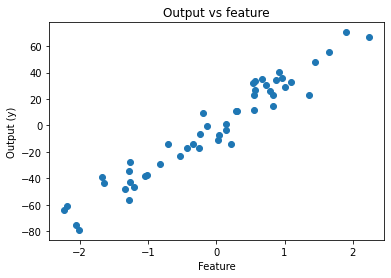

In [12]:
# visualize
plt.scatter(X, y)
plt.xlabel("Feature")
plt.ylabel("Output (y)")
plt.title("Output vs feature")
plt.show()

In [21]:
def predict(X, y, test_point, k=3):
    # distance = ((X - test_point)**2).sum(1)**0.5
    distance = np.linalg.norm(X - test_point, ord = 2, axis=1)
    knn_idx = np.argsort(distance)[:k]
    pred = y[knn_idx].mean()
    return pred, knn_idx

In [17]:
X[0], test_points[0]

(array([-2.22266168]), -2.222661683086091)

In [26]:
test_points = np.linspace(X[:,0].min(), X[:,0].max(), 200)
ypred = []
for tp in test_points:
    pred, idx = predict(X, y, [tp], k=10)
    ypred.append(pred)

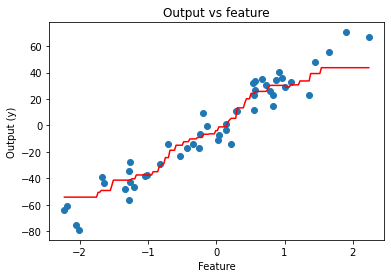

In [27]:
plt.scatter(X, y)
plt.plot(test_points, ypred, color="red")
plt.xlabel("Feature")
plt.ylabel("Output (y)")
plt.title("Output vs feature")
plt.show()

- The red horizontal lines show that the output variable y is constant even though there is change in X (feature).  
- Reason being the k-nearest neighbours corresponding to the x_values in horizontal line regions are same. And therefore their mean is same.    
- But this is not the correct approximation of the given data. As we can clearly see a constant change in y as x is changing.  

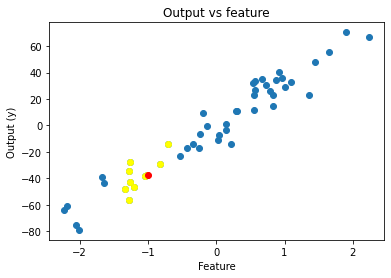

In [25]:
test_point= [-1]
pred, knn_idx = predict(X, y, test_point, k=10) 
plt.scatter(X, y) # training data
plt.scatter(X[knn_idx], y[knn_idx], c="yellow") # yellow dots are nearest neighbour of my test_point 
plt.scatter(test_point, pred, c="red") # test point
plt.xlabel("Feature")
plt.ylabel("Output (y)")
plt.title("Output vs feature")
plt.show()